In [53]:
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom
from presidio_image_redactor import DicomImageRedactorEngine

In [54]:
def compare_dicom_images(
    instance_original: pydicom.dataset.FileDataset,
    instance_redacted: pydicom.dataset.FileDataset,
    figsize: tuple = (11, 11)
) -> None:
    """Display the DICOM pixel arrays of both original and redacted as images.

    Args:
        instance_original (pydicom.dataset.FileDataset): A single DICOM instance (with text PHI).
        instance_redacted (pydicom.dataset.FileDataset): A single DICOM instance (redacted PHI).
        figsize (tuple): Figure size in inches (width, height).
    """
    _, ax = plt.subplots(1, 2, figsize=figsize)
    ax[0].imshow(instance_original.pixel_array, cmap="gray")
    ax[0].set_title('Original')
    ax[1].imshow(instance_redacted.pixel_array, cmap="gray")
    ax[1].set_title('Redacted')

In [55]:
engine = DicomImageRedactorEngine()

In [56]:
# Load in and process your DICOM file as needed
dicom_instance = pydicom.dcmread('sample_data/0_ORIGINAL.dcm')

In [57]:
# Redact
redacted_dicom_instance = engine.redact(dicom_instance, fill="contrast")

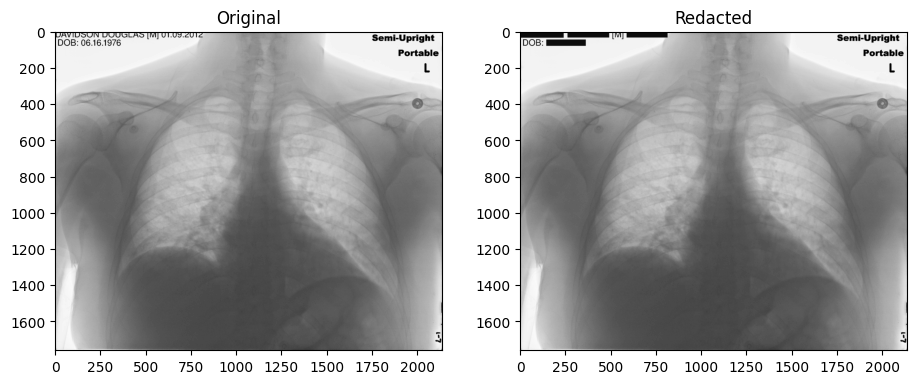

In [58]:
compare_dicom_images(dicom_instance, redacted_dicom_instance)

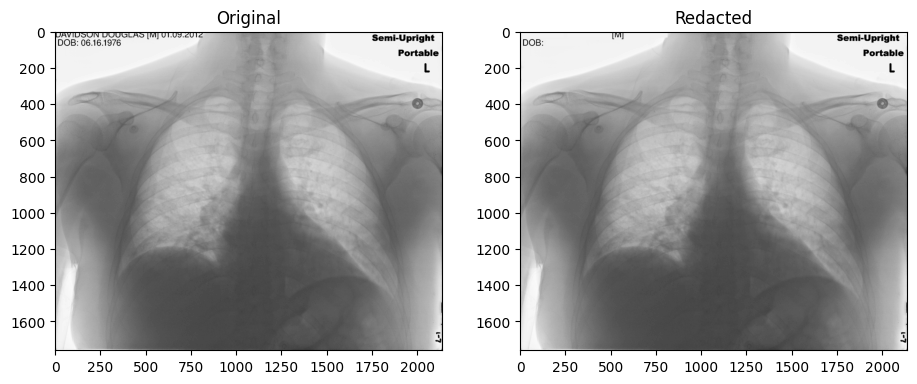

In [59]:
redacted_dicom_instance_2 = engine.redact(dicom_instance, fill="background")
compare_dicom_images(dicom_instance, redacted_dicom_instance_2)

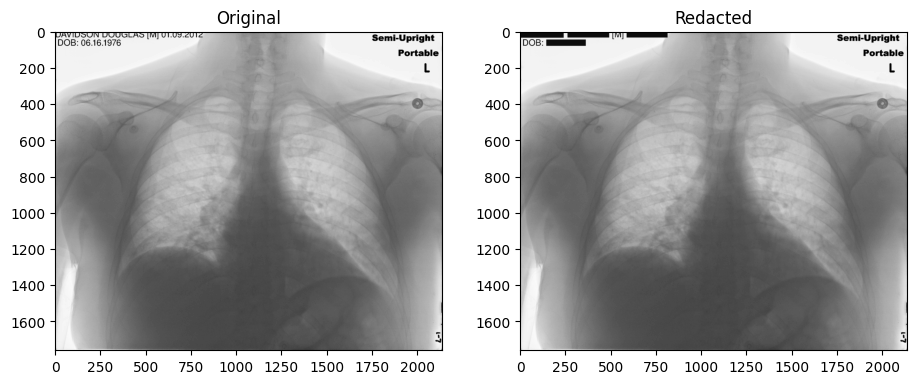

In [60]:
redacted_dicom_instance = engine.redact(dicom_instance, use_metadata=False) # default is use_metadata=True
compare_dicom_images(dicom_instance, redacted_dicom_instance)

Number of redacted regions: 4
[{'left': 0, 'top': 0, 'width': 241, 'height': 37, 'entity_type': 'PERSON'}, {'left': 262, 'top': 0, 'width': 230, 'height': 36, 'entity_type': 'PERSON'}, {'left': 588, 'top': 1, 'width': 226, 'height': 35, 'entity_type': 'DATE_TIME'}, {'left': 145, 'top': 47, 'width': 218, 'height': 35, 'entity_type': 'PHONE_NUMBER'}]


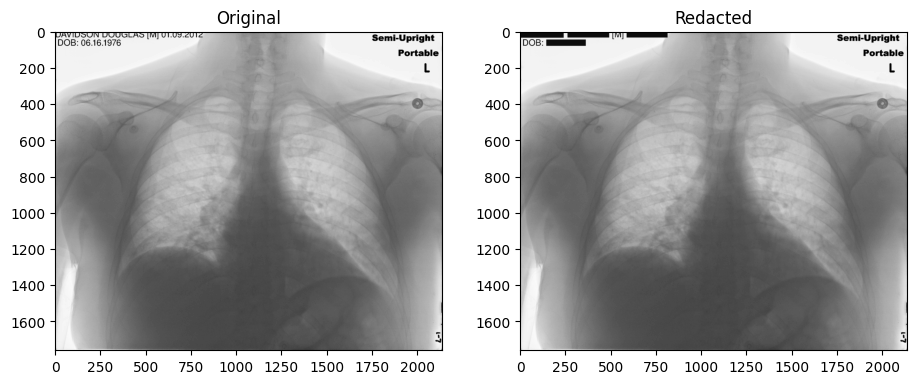

In [61]:
redacted_dicom_instance, bbox = engine.redact_and_return_bbox(dicom_instance)
compare_dicom_images(dicom_instance, redacted_dicom_instance)
print(f"Number of redacted regions: {len(bbox)}")
print(bbox)